In [ ]:
## AIM: To find the set of wavefronts that will create the same incoherent PSFs
## Reasoning: Incoherent PSF has lost the phase info and squared so maybe certain differnt combinations
##          might lead to the same psf. Analytically it can be shown that two wavefronts theta1 and theta2
##          will make same PSF if theta2(k)=theta1(-k), i.e symmetric Zernikes with negative weights will 
##          will produce the same PSF.[Using property of Fourier Transform]
## Finding: Only symmetric wavefronts will have two identical PSFs when their weights are reversed. 
## Eg: pos and neg Defocus, pos and neg Astigmation

In [ ]:
# import numpy as np
from phasediv import PhaseDiv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/dsaha/Python/alpao_calibration")
from calibration import Calibration

In [22]:
size_X = 512;
size_Y = 512;
p = PhaseDiv2(dshape = (size_Y,size_X),   # shape of the output stack (Nz,Ny,Nx)
              units = (.2,)*2,          # pixelsize (dz,dy,dx) in micron
              lam = 0.5,                # wavelength in micron
              NA=0.8,                 # Numerical Aperture of the detection obcejtive
              n = 1.33                  # refractive index of medium
              )

In [167]:
# The comparision PSF is generated here
wavefront = 3*p.zernike(5)

#Generating the corresponding psf and normalizing and storing them as a tuple
_psf = np.fft.fftshift(p._psf_incoherent(wavefront))
psf = (_psf-np.min(_psf))/(np.max(_psf)-np.min(_psf))

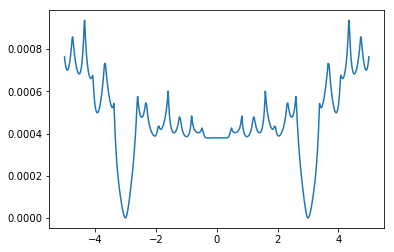

In [105]:
# Check for ONLY same Zernike mode PSF equivalence 
weights = np.linspace(-5,5,1000)

wavefronts = np.array([w*p.zernike(5) for w in weights])

_psfs = np.array([np.fft.fftshift(p._psf_incoherent(wave)) for wave in wavefronts])
psfs = np.array([(_p-np.min(_p))/(np.max(_p)-np.min(_p)) for _p in _psfs])
psfs.shape

diff = np.array([np.mean(np.square(p-psf)) for _,p in enumerate(psfs)])
diff.shape
print(diff[500],weights[np.argmin(diff)])

plt.plot(weights,diff)

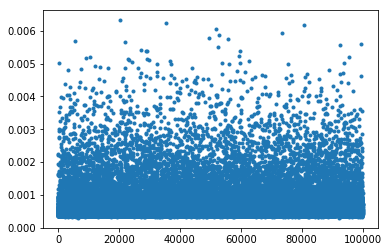

In [165]:
# Generate random PSFs and find the difference

#Parameters for dataset
datapoints = 100000
number_of_modes = 10
lowerlimit= -5
upperlimit= 5


# Generating random weights for zernike modes
zern_weights = np.random.uniform(lowerlimit,upperlimit,size=(datapoints,number_of_modes))
diff = []

# Creating the PSF
for i in range(0,datapoints):
    wavefronts = np.sum([_z*p.zernike(j+1) for j,_z in enumerate(zern_weights[i,:])],axis = 0)
    
    #Generating the PSF
    _psfs = np.fft.fftshift(p._psf_incoherent(wavefronts))
    psfs = (_psfs-np.min(_psfs))/(np.max(_psfs)-np.min(_psfs))
    diff.append(np.mean(np.square(psfs-psf)))

plt.plot(diff,'.')

In [166]:
print(np.min(diff))

0.000294149
